# MASTER - Notebook 1
### Matteo Grazioso 884055

In [81]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Create a requirements.txt file
!pip freeze > requirements.txt


In [82]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [83]:
# The file contains the data of the validation of tickets in the city of public transport of Venice.

# Import the data into a dataframe of a txt file 
path = 'data/raw/validazioni.txt'                     # Period: 2022-05-13 to 2022-07-15
# path = 'data/raw/esportazioneCompleta.txt'            # Period: 2023-01-23 to 2023-03-14

df = pd.read_csv(path, header=0, sep='\t')
# Save the name of the file in a variable for future use extracting the name of the file from the path
file_name = path.split('/')[-1].split('.')[0]

In [84]:
# Check the first 5 rows of the data
df.head()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,13/05/2022 00:00,65676291870913797,5089,"FERROVIA ""D""",11149,"7gg-Tpl 43,60-ComVe16,40"
1,13/05/2022 00:00,36141384536591364,5032,"FERROVIA ""B""",11107,"48h-Tpl 24,90-ComVe5,10"
2,13/05/2022 00:00,36144856606063108,5031,"P.le Roma ""G",11108,"72h-Tpl 33,40-ComVe6,60"
3,13/05/2022 00:00,36144856608393988,506,VENEZIA,12106,Bigl Aer-Venezia TSC
4,13/05/2022 00:00,36144856608393732,506,VENEZIA,12106,Bigl Aer-Venezia TSC


In [85]:
# Check the last 5 rows of the data
df.tail()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
5056636,15/07/2022 06:46,36141603027798788,3435,Oriago Stazi,14123,Extra tratta 3
5056637,15/07/2022 06:46,36141603027798788,3435,Oriago Stazi,14123,Extra tratta 3
5056638,15/07/2022 06:46,36141603027798788,3436,Oriago Centr,14123,Extra tratta 3
5056639,15/07/2022 07:01,65676630087266309,1306,Spinea Orgna,14123,Extra tratta 3
5056640,15/07/2022 07:07,36428626034318852,1312,Spinea Giorg,14123,Extra tratta 3


In [86]:
# Create a subset of the data with the first 10% of the rows
# df = df.iloc[:int(len(df)*0.1), :]

## Explorative Data Analysis


In [87]:
# Dates and hour of the validation of the ticket are in the same column 'DATA_VALIDAZIONE'
# Split the column 'DATA_VALIDAZIONE' into two columns 'DATA' and 'ORA' and convert them to datetime format
df.insert(0, 'DATA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[0], format='%d/%m/%Y'))
df.insert(1, 'ORA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[1], format='%H:%M').dt.time)

# Drop the column 'DATA_VALIDAZIONE'
# df.drop('DATA_VALIDAZIONE', axis=1, inplace=True)

# Display the first 5 rows of the dataframe
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,2022-05-13,00:00:00,13/05/2022 00:00,65676291870913797,5089,"FERROVIA ""D""",11149,"7gg-Tpl 43,60-ComVe16,40"
1,2022-05-13,00:00:00,13/05/2022 00:00,36141384536591364,5032,"FERROVIA ""B""",11107,"48h-Tpl 24,90-ComVe5,10"
2,2022-05-13,00:00:00,13/05/2022 00:00,36144856606063108,5031,"P.le Roma ""G",11108,"72h-Tpl 33,40-ComVe6,60"
3,2022-05-13,00:00:00,13/05/2022 00:00,36144856608393988,506,VENEZIA,12106,Bigl Aer-Venezia TSC
4,2022-05-13,00:00:00,13/05/2022 00:00,36144856608393732,506,VENEZIA,12106,Bigl Aer-Venezia TSC


In [88]:
# Set the format of the timestamp
df['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'], format='%d/%m/%Y %H:%M')

In [89]:
# Print the date of the first and last validation using both data and hour
print('First validation: ', df['DATA'].min(), df['ORA'].min())
print('Last validation: ', df['DATA'].max(), df['ORA'].max())

# Print the number of Serial numbers
print('Number of Serial numbers: ', df['SERIALE'].nunique())

# Print the number of validation (rows)
print('Number of validation: ', df.shape[0])

# Print the number of tickets
print('Number of tickets: ', df['DESCRIZIONE_TITOLO'].nunique())
# Print the number of titolo
print('Number of titolo: ', df['TITOLO'].nunique())
# TODO: why the number of unique TITOLO is different from the number of DESCRIZIONE_TITOLO?

# Print the number of FERMATA
print('Number of FERMATA: ', df['FERMATA'].nunique())
# Print the number of DESCRIZIONE
print('Number of DESCRIZIONE: ', df['DESCRIZIONE'].nunique())
# TODO: why the number of unique DESCRIZIONE is different from the number of FERMATA?

First validation:  2022-05-13 00:00:00 00:00:00
Last validation:  2022-07-15 00:00:00 23:59:00
Number of Serial numbers:  2038775
Number of validation:  5056641
Number of tickets:  168
Number of titolo:  170
Number of FERMATA:  1672
Number of DESCRIZIONE:  935


In [90]:
# Which is the most used ticket?
df['DESCRIZIONE_TITOLO'].value_counts().head(10)

DAILY PASS VENEZIA - AVM         972478
75'-Tpl 6,64-ComVe0,86           743608
48h-Tpl 24,90-ComVe5,10          600320
72h-Tpl 33,40-ComVe6,60          492911
Bigl.Aut.75'Mestre/Lido-tsc      422668
7gg-Tpl 43,60-ComVe16,40         342870
75'-Tpl 13,28-ComVe1,72          232644
Biglietto 72 ore Roll. Venice    170675
72ore online no aerobus          108357
7 days online no aerobus         101869
Name: DESCRIZIONE_TITOLO, dtype: int64

In [91]:
# Which is the most frequent validation in date and hour?
# Date and hour are in two different columns; DATA_VALIDAZIONE does not exist anymore
df.groupby(['DATA', 'ORA'])['SERIALE'].count().sort_values(ascending=False).head(10)
# TODO: #4 Re-aswer the question of the most frequent validation after cleaning operations

DATA        ORA     
2022-05-17  03:38:00    383
2022-05-18  03:38:00    362
2022-06-04  15:27:00    258
2022-05-27  17:25:00    258
2022-06-03  16:28:00    254
2022-05-27  10:26:00    250
            10:54:00    249
2022-06-04  16:26:00    247
2022-05-27  11:14:00    246
            10:10:00    242
Name: SERIALE, dtype: int64

In [92]:
# Which is the most frequent FERMATA?
df['DESCRIZIONE'].value_counts().head(10)
# TODO: #4 Re-aswer the question of the most frequent FERMATA after cleaning operations

San Marco-Sa    583170
Rialto          346023
LIDO S.M.E.     274706
BURANO "C"      248780
VENEZIA         238940
P.le Roma "G    220171
FERROVIA "B"    194802
San Marco Va    145476
Punta Sabbio    114300
FERROVIA "D"    101044
Name: DESCRIZIONE, dtype: int64

## Categories

In [93]:
# Add a new column with the code profile of the ticket
df.insert(7, "TICKET_CODE", 'TBD')

This column will be filled with the code of the ticket profile according to the ticket type and the ticket validity as follows:

**1.** One-day ticket

**2.** Two-day ticket

**3.** Three-day ticket

**4.** Weekly ticket (Seven-day ticket)

**5.** Monthly ticket

**5-STUD.** Monthly ticket for students

**5-RET.** Monthly ticket for retirees

**5-WKRS.** Monthly ticket for workers

**6.** Annual ticket

**6-STUD.** Annual ticket for students

**6-RET.** Annual ticket for retirees

**6-WKRS.** Annual ticket for workers

**7.** 75 minutes ticket

**8.** Other ticket (if it is necessary to add other types of tickets)

In [94]:
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO
0,2022-05-13,00:00:00,2022-05-13,65676291870913797,5089,"FERROVIA ""D""",11149,TBD,"7gg-Tpl 43,60-ComVe16,40"
1,2022-05-13,00:00:00,2022-05-13,36141384536591364,5032,"FERROVIA ""B""",11107,TBD,"48h-Tpl 24,90-ComVe5,10"
2,2022-05-13,00:00:00,2022-05-13,36144856606063108,5031,"P.le Roma ""G",11108,TBD,"72h-Tpl 33,40-ComVe6,60"
3,2022-05-13,00:00:00,2022-05-13,36144856608393988,506,VENEZIA,12106,TBD,Bigl Aer-Venezia TSC
4,2022-05-13,00:00:00,2022-05-13,36144856608393732,506,VENEZIA,12106,TBD,Bigl Aer-Venezia TSC


In [95]:
# Create a dictionary with the ticket code and the ticket profile
dict_tickets = {'1': 'One-day ticket', '2': 'Two-day ticket', '3': 'Three-day ticket', 
                '4': 'Seven-day ticket', 
                '5': 'Monthly ticket', '5-STUD': 'Monthly ticket for students',
                '5-RET': 'Monthly ticket for retired', '5-WKRS': 'Monthly ticket for workers',
                '6': 'Annual ticket', '6-STUD': 'Annual ticket for students', '6-RET': 'Annual ticket for retired',
                '6-WKRS': 'Annual ticket for workers',
                '7': '75 minutes ticket', '8': 'Other ticket'}

# Export the dictionary to a json file
with open('data/dictionaries/dict_ticket_codes.json', 'w') as fp:
    json.dump(dict_tickets, fp)

In [96]:
# How many unique values are there in the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].nunique()

168

In [97]:
# Which are the unique values of the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].unique()

array(['7gg-Tpl 43,60-ComVe16,40', '48h-Tpl 24,90-ComVe5,10',
       '72h-Tpl 33,40-ComVe6,60', 'Bigl Aer-Venezia TSC',
       'DAILY PASS VENEZIA - AVM', '72H R.Venice+aerop.AR online',
       "75'-Tpl 6,64-ComVe0,86", 'Biglietto 72 ore Roll. Venice',
       "Bigl.Aut.75'Mestre/Lido-tsc", 'Aer+boat-Tpl14,50-C.Ve1,50',
       '72hAerCS-Tpl40,40-CVe6,60', 'Aeroporto-Venezia AR',
       '72 ore R.Venice online', '7 days online no aerobus',
       '72hAerAR-Tpl46,40-CVe6,60', '48hAerCS-Tpl31,90-CVe5,10',
       'Bicicletta "Palmare"', 'L.17-auto "C"da 4,01 a 4,50 mt',
       '72ore online no aerobus', 'L.17-auto "AeB" fino a 4 metri',
       '48ore online no aerobus', "75'-Tpl 13,28-ComVe1,72",
       'Extra tratta 4 ', '48ore online aerobus AR',
       'Daily Pass Venezia Online', 'Ferry17-carri+35q.rim.',
       'Ferry17-autocarri+35q.', 'Ferry11-autocarri+35q.',
       'Extra tratta 5 ', 'L.17-auto "D" oltre metri 4,50',
       'Extra tratta 2 ', 'Ciclomotore fino 50cc',
       'Bicicl

In [98]:
# Get the number of unique values of the column 'DESCRIZIONE_TITOLO'
num_unique_DESCRIZIONE_TITOLO = len(df['DESCRIZIONE_TITOLO'].unique())
print('The number of unique values of the column DESCRIZIONE_TITOLO is: ', num_unique_DESCRIZIONE_TITOLO)

The number of unique values of the column DESCRIZIONE_TITOLO is:  168


In [99]:
# Convert the column 'DESCRIZIONE_TITOLO' into upper case 
df['DESCRIZIONE_TITOLO'] = df['DESCRIZIONE_TITOLO'].str.upper()
# Count the number of unique values of the column 'DESCRIZIONE_TITOLO'
df['DESCRIZIONE_TITOLO'].value_counts()

DAILY PASS VENEZIA - AVM          972478
75'-TPL 6,64-COMVE0,86            743608
48H-TPL 24,90-COMVE5,10           600320
72H-TPL 33,40-COMVE6,60           492911
BIGL.AUT.75'MESTRE/LIDO-TSC       422668
7GG-TPL 43,60-COMVE16,40          342870
75'-TPL 13,28-COMVE1,72           232644
BIGLIETTO 72 ORE ROLL. VENICE     170675
72ORE ONLINE NO AEROBUS           108357
7 DAYS ONLINE NO AEROBUS          101869
PEOPLEMOVER+BUS+TRAM 75'           85968
BIGL AER-VENEZIA TSC               71552
48ORE ONLINE NO AEROBUS            65389
72 ORE R.VENICE ONLINE             59982
TRAGH-TPL 8,82-C.VE1,18            38351
DAILY PASS VENEZIA ONLINE          36709
EXTRA TRATTA 2                     33102
CAV -TREP + ACTV 24H               25071
EXTRA TRATTA 3                     22710
BICICLETTA "BIGLIETTERIA"          20041
JESOLO + ACTV 24H                  17869
NA-24H METROPOLITANO ORD+2         17203
NA-24H METROPOLITANO ORD+1         15662
L.17-AUTO "D" OLTRE METRI 4,50     14081
CAV-TREP - S.MAR

### One-day tickets

In [100]:
# Which type of ticket are one-day tickets and how many are there?
# Exclude the tickets that contains 1MESE OR 1 MESE
df[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY')]['DESCRIZIONE_TITOLO'].value_counts()

DAILY PASS VENEZIA - AVM          972478
DAILY PASS VENEZIA ONLINE          36709
CAV -TREP + ACTV 24H               25071
JESOLO + ACTV 24H                  17869
NA-24H METROPOLITANO ORD+2         17203
NA-24H METROPOLITANO ORD+1         15662
24HAERCS-TPL22,90-CVE5,10           8048
T.FUSINA VE+ACTV 24 ORE             3713
CAORLE-P.S.MARGH. + ACTV 24H        1297
24HAERAR-TPL28,90-CVE5,10           1209
24ORE ONLINE AEROBUS CS              893
BIBIONE + ACTV 24H                   845
NA-24H-TPL 14,90-COM.VE5,10          532
24ORE ONLINE NO AEROBUS              457
24H METROPOLITANO ORD ONLINE         435
24H METROPOLITANO ORD+2 ONLINE       346
24H METROPOLITANO ORD+1 ONLINE       239
24ORE ONLINE AEROBUS AR              222
ERACLEAMARE + ACTV 24H               204
NA-24H METROPOLITANO ORD.             97
NA-24H METROPOLITANO RES+1            31
LIGNANO + ACTV 24H                    25
VILLE VENETE+24H ACTV URB+NAV         18
NA-24H METROPOLITANO RES+2            17
NA-24H METROPOLI

In [101]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity 
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY'), 'TICKET_CODE'] = '1'

In [102]:
# TICKET_CODE = 1: Information about one-day tickets
print("The number of one-day tickets is: ", df[df['TICKET_CODE'] == '1'].shape[0])
print("The number of tickets for each type of one-day ticket is: ")
df[df['TICKET_CODE'] == '1']['DESCRIZIONE_TITOLO'].value_counts()

The number of one-day tickets is:  1103633
The number of tickets for each type of one-day ticket is: 


DAILY PASS VENEZIA - AVM          972478
DAILY PASS VENEZIA ONLINE          36709
CAV -TREP + ACTV 24H               25071
JESOLO + ACTV 24H                  17869
NA-24H METROPOLITANO ORD+2         17203
NA-24H METROPOLITANO ORD+1         15662
24HAERCS-TPL22,90-CVE5,10           8048
T.FUSINA VE+ACTV 24 ORE             3713
CAORLE-P.S.MARGH. + ACTV 24H        1297
24HAERAR-TPL28,90-CVE5,10           1209
24ORE ONLINE AEROBUS CS              893
BIBIONE + ACTV 24H                   845
NA-24H-TPL 14,90-COM.VE5,10          532
24ORE ONLINE NO AEROBUS              457
24H METROPOLITANO ORD ONLINE         435
24H METROPOLITANO ORD+2 ONLINE       346
24H METROPOLITANO ORD+1 ONLINE       239
24ORE ONLINE AEROBUS AR              222
ERACLEAMARE + ACTV 24H               204
NA-24H METROPOLITANO ORD.             97
NA-24H METROPOLITANO RES+1            31
LIGNANO + ACTV 24H                    25
VILLE VENETE+24H ACTV URB+NAV         18
NA-24H METROPOLITANO RES+2            17
NA-24H METROPOLI

In [103]:
print("Information about the tickets with code 1 related to the serial number: ")
df[df['TICKET_CODE'] == '1'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 1 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
24H METROPOLITANO ORD ONLINE,147.0,2.959184,2.093295,1.0,2.00,2.0,3.50,11.0
24H METROPOLITANO ORD+1 ONLINE,62.0,3.854839,1.998744,1.0,3.00,4.0,5.00,13.0
24H METROPOLITANO ORD+2 ONLINE,75.0,4.613333,3.533214,1.0,2.00,4.0,5.50,20.0
"24HAERAR-TPL28,90-CVE5,10",299.0,4.043478,2.642220,1.0,2.00,4.0,5.00,24.0
"24HAERCS-TPL22,90-CVE5,10",2092.0,3.847036,2.333202,1.0,2.00,4.0,5.00,16.0
24ORE ONLINE AEROBUS AR,49.0,4.530612,2.102598,1.0,3.00,5.0,6.00,9.0
24ORE ONLINE AEROBUS CS,187.0,4.775401,2.563775,1.0,3.00,5.0,6.00,15.0
24ORE ONLINE NO AEROBUS,122.0,3.745902,2.283833,1.0,2.00,3.0,5.00,12.0
BIBIONE + ACTV 24H,312.0,2.708333,1.315818,1.0,2.00,3.0,4.00,8.0


### Two days tickets

In [104]:
# Which type of ticket are two-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

48H-TPL 24,90-COMVE5,10      600320
48ORE ONLINE NO AEROBUS       65389
48HAERCS-TPL31,90-CVE5,10      9889
48HAERAR-TPL37,90-CVE5,10      3312
48ORE ONLINE AEROBUS CS        2386
48ORE ONLINE AEROBUS AR        1532
Name: DESCRIZIONE_TITOLO, dtype: int64

In [105]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE'), 'TICKET_CODE'] = '2'

In [106]:
# TICKET_CODE = 2: Information about two-day tickets
print("The number of two-day tickets is: ", df[df['TICKET_CODE'] == '2'].shape[0])
print("The number of tickets for each type of two-day ticket is: ")
df[df['TICKET_CODE'] == '2']['DESCRIZIONE_TITOLO'].value_counts()

The number of two-day tickets is:  682828
The number of tickets for each type of two-day ticket is: 


48H-TPL 24,90-COMVE5,10      600320
48ORE ONLINE NO AEROBUS       65389
48HAERCS-TPL31,90-CVE5,10      9889
48HAERAR-TPL37,90-CVE5,10      3312
48ORE ONLINE AEROBUS CS        2386
48ORE ONLINE AEROBUS AR        1532
Name: DESCRIZIONE_TITOLO, dtype: int64

In [107]:
print("Information about the tickets with code 2 related to the serial number: ")
df[df['TICKET_CODE'] == '2'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 2 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"48H-TPL 24,90-COMVE5,10",94201.0,6.372756,3.520071,1.0,4.0,6.0,8.00,68.0
"48HAERAR-TPL37,90-CVE5,10",405.0,8.177778,4.356968,1.0,5.0,7.0,11.00,28.0
"48HAERCS-TPL31,90-CVE5,10",1378.0,7.176343,3.897204,1.0,4.0,7.0,9.00,23.0
48ORE ONLINE AEROBUS AR,200.0,7.660000,3.281500,2.0,5.0,7.0,9.25,19.0
48ORE ONLINE AEROBUS CS,344.0,6.936047,3.937038,1.0,4.0,7.0,9.00,25.0
48ORE ONLINE NO AEROBUS,10733.0,6.092332,3.450538,1.0,4.0,6.0,8.00,37.0


### Three days tickets

In [108]:
# Which type of ticket are three-day tickets and how many are there?
# Do not consider the ticket that contains also 75
df[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

72H-TPL 33,40-COMVE6,60           492911
BIGLIETTO 72 ORE ROLL. VENICE     170675
72ORE ONLINE NO AEROBUS           108357
72 ORE R.VENICE ONLINE             59982
72 ORE R.VENICE+AEROPORTO CS       12018
72HAERCS-TPL40,40-CVE6,60           9855
72HAERAR-TPL46,40-CVE6,60           8152
72H RVENICE+AEROP.CS ONLINE         6190
72ORE ONLINE AEROBUS AR             6055
72H R.VENICE+AEROP.AR ONLINE        5087
72 ORE R.VENICE+AEROPORTO AR        4963
72ORE ONLINE AEROBUS CS             4565
ATVO CANOVA+ACTV 72H ONLINE         2788
T.FUSINA VE+ACTV 72 ORE             2691
ATVOCANOVA+ACTV 72HROLL.ONLINE      2260
ATVO CANOVA+ACTV 72H                1769
CAV - TREP + ACTV 72H                544
ATVO CANOVA+ACTV 72H ROLLING           1
Name: DESCRIZIONE_TITOLO, dtype: int64

In [109]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE'), 'TICKET_CODE'] = '3'

In [110]:
# TICKET_CODE = 3: Information about three-day tickets
print("The number of three-day tickets is: ", df[df['TICKET_CODE'] == '3'].shape[0])
print("The number of tickets for each type of three-day ticket is: ")
df[df['TICKET_CODE'] == '3']['DESCRIZIONE_TITOLO'].value_counts()

The number of three-day tickets is:  898863
The number of tickets for each type of three-day ticket is: 


72H-TPL 33,40-COMVE6,60           492911
BIGLIETTO 72 ORE ROLL. VENICE     170675
72ORE ONLINE NO AEROBUS           108357
72 ORE R.VENICE ONLINE             59982
72 ORE R.VENICE+AEROPORTO CS       12018
72HAERCS-TPL40,40-CVE6,60           9855
72HAERAR-TPL46,40-CVE6,60           8152
72H RVENICE+AEROP.CS ONLINE         6190
72ORE ONLINE AEROBUS AR             6055
72H R.VENICE+AEROP.AR ONLINE        5087
72 ORE R.VENICE+AEROPORTO AR        4963
72ORE ONLINE AEROBUS CS             4565
ATVO CANOVA+ACTV 72H ONLINE         2788
T.FUSINA VE+ACTV 72 ORE             2691
ATVOCANOVA+ACTV 72HROLL.ONLINE      2260
ATVO CANOVA+ACTV 72H                1769
CAV - TREP + ACTV 72H                544
ATVO CANOVA+ACTV 72H ROLLING           1
Name: DESCRIZIONE_TITOLO, dtype: int64

In [111]:
print("Information about the tickets with code 3 related to the serial number: ")
df[df['TICKET_CODE'] == '3'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 3 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
72 ORE R.VENICE ONLINE,7418.0,8.086007,4.727938,1.0,5.0,7.0,11.0,113.0
72 ORE R.VENICE+AEROPORTO AR,515.0,9.636893,4.598913,1.0,7.0,9.0,13.0,26.0
72 ORE R.VENICE+AEROPORTO CS,1338.0,8.982063,4.823866,1.0,5.0,8.0,12.0,28.0
72H R.VENICE+AEROP.AR ONLINE,496.0,10.256048,5.270938,1.0,7.0,10.0,13.0,29.0
72H RVENICE+AEROP.CS ONLINE,670.0,9.238806,4.770016,1.0,6.0,9.0,12.0,35.0
"72H-TPL 33,40-COMVE6,60",59213.0,8.324371,4.569172,1.0,5.0,8.0,11.0,109.0
"72HAERAR-TPL46,40-CVE6,60",809.0,10.076638,4.653494,1.0,7.0,9.0,13.0,27.0
"72HAERCS-TPL40,40-CVE6,60",1048.0,9.403626,4.767394,1.0,6.0,9.0,12.0,27.0
72ORE ONLINE AEROBUS AR,610.0,9.926230,4.843305,1.0,7.0,9.0,13.0,25.0


### Seven days tickets

In [112]:
# Which type of ticket are weekly tickets and how many are there?
# Exclude the tickets that contains also 72, 75 that are three-day tickets, 17, 48h, 57 that are other types of tickets and
# 'tratt*' and 'tr' that are reserved to specific routes
df[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS')]['DESCRIZIONE_TITOLO'].value_counts()

7GG-TPL 43,60-COMVE16,40      342870
7 DAYS ONLINE NO AEROBUS      101869
7GGAERAR-TPL56,60-CVE16,40     13902
7 DAYS ONLINE AEROBUS AR       13366
7GGAERCS-TPL50,60-CVE16,40      6295
7 DAYS ONLINE AEROBUS CS        3933
Name: DESCRIZIONE_TITOLO, dtype: int64

In [113]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS'), 'TICKET_CODE'] = '4'

In [114]:
# TICKET_CODE = 4: Information about weekly tickets
print("The number of weekly tickets is: ", df[df['TICKET_CODE'] == '4'].shape[0])
print("The number of tickets for each type of weekly ticket is: ")
df[df['TICKET_CODE'] == '4']['DESCRIZIONE_TITOLO'].value_counts()

The number of weekly tickets is:  482235
The number of tickets for each type of weekly ticket is: 


7GG-TPL 43,60-COMVE16,40      342870
7 DAYS ONLINE NO AEROBUS      101869
7GGAERAR-TPL56,60-CVE16,40     13902
7 DAYS ONLINE AEROBUS AR       13366
7GGAERCS-TPL50,60-CVE16,40      6295
7 DAYS ONLINE AEROBUS CS        3933
Name: DESCRIZIONE_TITOLO, dtype: int64

In [115]:
print("Information about the tickets with code 4 related to the serial number: ")
df[df['TICKET_CODE'] == '4'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 4 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
7 DAYS ONLINE AEROBUS AR,910.0,14.687912,8.249103,1.0,9.0,14.0,19.0,53.0
7 DAYS ONLINE AEROBUS CS,265.0,14.841509,8.184275,1.0,10.0,14.0,19.0,47.0
7 DAYS ONLINE NO AEROBUS,7815.0,13.035061,7.271917,1.0,8.0,12.0,17.0,57.0
"7GG-TPL 43,60-COMVE16,40",24879.0,13.781502,7.986574,1.0,8.0,13.0,18.0,121.0
"7GGAERAR-TPL56,60-CVE16,40",881.0,15.779796,7.995402,1.0,10.0,15.0,21.0,46.0
"7GGAERCS-TPL50,60-CVE16,40",420.0,14.988095,8.377567,1.0,9.0,14.5,20.0,57.0


### Monthly tickets

In [116]:
# Whick type of ticket are monthly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS')]['DESCRIZIONE_TITOLO'].value_counts()

ABBONAMENTO 30 GG.PEOPLEMOVER    1509
MENS. COSE ANIMALI RETE UNICA      48
Name: DESCRIZIONE_TITOLO, dtype: int64

In [117]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS'), 'TICKET_CODE'] = '5'

In [118]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '5-STUD' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')), 'TICKET_CODE'] = '5-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '5-WKRS' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV|LAV')), 'TICKET_CODE'] = '5-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '5-RET' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '5-RET'

In [119]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the DDRG 1201-1297/2022 tickets are monthly tickets for blind people

# Which type of ticket are yearly tickets for blind people and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022')]['DESCRIZIONE_TITOLO'].value_counts()

Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [120]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022'), 'TICKET_CODE'] = '5'

In [121]:
# TICKET_CODE = 5: Information about monthly tickets
print("The number of monthly tickets is: ", df[df['TICKET_CODE'] == '5'].shape[0])
print("The number of monthly tickets for students is: ", df[df['TICKET_CODE'] == '5-STUD'].shape[0])
print("The number of monthly tickets for workers is: ", df[df['TICKET_CODE'] == '5-WKRS'].shape[0])
print("The number of monthly tickets for retired people is: ", df[df['TICKET_CODE'] == '5-RET'].shape[0])

print("The number of tickets for each type of monthly ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of monthly tickets is:  1557
The number of monthly tickets for students is:  0
The number of monthly tickets for workers is:  0
The number of monthly tickets for retired people is:  0
The number of tickets for each type of monthly ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO           
5            ABBONAMENTO 30 GG.PEOPLEMOVER    1509
             MENS. COSE ANIMALI RETE UNICA      48
Name: DESCRIZIONE_TITOLO, dtype: int64

In [122]:
print("Information about the tickets with code 5 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 5 (including the subtypes) related to the serial number: 


count      mean        std  min  \
TICKET_CODE DESCRIZIONE_TITOLO                                               
5           ABBONAMENTO 30 GG.PEOPLEMOVER  223.0  6.766816  11.755366  1.0   
            MENS. COSE ANIMALI RETE UNICA    5.0  9.600000   8.848729  1.0   

                                           25%   50%   75%   max  
TICKET_CODE DESCRIZIONE_TITOLO                                    
5           ABBONAMENTO 30 GG.PEOPLEMOVER  1.0   1.0   4.0  58.0  
            MENS. COSE ANIMALI RETE UNICA  1.0  12.0  12.0  22.0

### Yearly tickets

In [123]:
# Which type of ticket are yearly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI')]['DESCRIZIONE_TITOLO'].value_counts()

Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [124]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI'), 'TICKET_CODE'] = '6'

In [125]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '6-STUD' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')), 'TICKET_CODE'] = '6-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '6-WKRS' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV|LAV')), 'TICKET_CODE'] = '6-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '6-RET' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '6-RET'

In [126]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the for OVER 75 are yearly tickets for free

# Which type of ticket are yearly tickets for OVER 75 and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI')]['DESCRIZIONE_TITOLO'].value_counts()

Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [127]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI'), 'TICKET_CODE'] = '6-RET'

In [128]:
# According to the page of yearly tickets available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/abbonamento-annuale-0), the bus pass for students has a validity of 12 months 

# Which type of ticket are yearly tickets for students and how many are there?
# Exclude the tickets that have already the field TICKET_CODE populated with 5-STUD or 6-STUD
df[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD']))]['DESCRIZIONE_TITOLO'].value_counts()

Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [129]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD'])), 'TICKET_CODE'] = '6-STUD'

In [130]:
# TICKET_CODE = 6: Information about annual tickets
print("The number of annual tickets is: ", df[df['TICKET_CODE'] == '6'].shape[0])
print("The number of annual tickets for students is: ", df[df['TICKET_CODE'] == '6-STUD'].shape[0])
print("The number of annual tickets for workers is: ", df[df['TICKET_CODE'] == '6-WKRS'].shape[0])
print("The number of annual tickets for retired people is: ", df[df['TICKET_CODE'] == '6-RET'].shape[0])

print("The number of tickets for each type of annual ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of annual tickets is:  0
The number of annual tickets for students is:  0
The number of annual tickets for workers is:  0
The number of annual tickets for retired people is:  0
The number of tickets for each type of annual ticket (including the subtypes) is: 


Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [131]:
print("Information about the tickets with code 6 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 6 (including the subtypes) related to the serial number: 


,count,mean,std,min,25%,50%,75%,max


### 75 minutes tickets

In [132]:
# Which type of ticket are 75' (75 minutes) tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN')]['DESCRIZIONE_TITOLO'].value_counts()

75'-TPL 6,64-COMVE0,86            743608
BIGL.AUT.75'MESTRE/LIDO-TSC       422668
75'-TPL 13,28-COMVE1,72           232644
PEOPLEMOVER+BUS+TRAM 75'           85968
BIGL.MESTRE/LIDO 75' A BORDO       12055
ORD. NAVIGAZIONE 75' ONLINE         6976
75'-TPL 12,60-CVE2,40 ONLINE        3524
BORDO 75MIN CARTAVENEZIA            3345
PEOPLEMOVER+BUS+TRAM 75'CARNET       648
VENDITA A BORDO 75' CV                13
VENDITA A BORDO 75' ORD.              10
Name: DESCRIZIONE_TITOLO, dtype: int64

In [133]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN'), 'TICKET_CODE'] = '7'

In [134]:
# TICKET_CODE = 7: Information about 75' (75 minutes) tickets
print("The number of 75' (75 minutes) tickets is: ", df[df['TICKET_CODE'] == '7'].shape[0])
print("The number of tickets for each type of 75' (75 minutes) ticket is: ")
df[df['TICKET_CODE'] == '7'].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of 75' (75 minutes) tickets is:  1511459
The number of tickets for each type of 75' (75 minutes) ticket is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
7            75'-TPL 6,64-COMVE0,86            743608
             BIGL.AUT.75'MESTRE/LIDO-TSC       422668
             75'-TPL 13,28-COMVE1,72           232644
             PEOPLEMOVER+BUS+TRAM 75'           85968
             BIGL.MESTRE/LIDO 75' A BORDO       12055
             ORD. NAVIGAZIONE 75' ONLINE         6976
             75'-TPL 12,60-CVE2,40 ONLINE        3524
             BORDO 75MIN CARTAVENEZIA            3345
             PEOPLEMOVER+BUS+TRAM 75'CARNET       648
             VENDITA A BORDO 75' CV                13
             VENDITA A BORDO 75' ORD.              10
Name: DESCRIZIONE_TITOLO, dtype: int64

In [135]:
print("Information about the tickets with code 7 related to the serial number: ")
df[df['TICKET_CODE'] == '7'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 7 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"75'-TPL 12,60-CVE2,40 ONLINE",2034.0,1.732547,0.605153,1.0,1.0,2.0,2.00,4.0
"75'-TPL 13,28-COMVE1,72",127257.0,1.828143,0.572819,1.0,2.0,2.0,2.00,7.0
"75'-TPL 6,64-COMVE0,86",669753.0,1.110272,0.370967,1.0,1.0,1.0,1.00,26.0
BIGL.AUT.75'MESTRE/LIDO-TSC,295281.0,1.431409,0.980805,1.0,1.0,1.0,2.00,20.0
BIGL.MESTRE/LIDO 75' A BORDO,11852.0,1.017128,0.132965,1.0,1.0,1.0,1.00,3.0
BORDO 75MIN CARTAVENEZIA,3196.0,1.046621,0.297119,1.0,1.0,1.0,1.00,10.0
ORD. NAVIGAZIONE 75' ONLINE,6175.0,1.129717,0.384991,1.0,1.0,1.0,1.00,4.0
PEOPLEMOVER+BUS+TRAM 75',84609.0,1.016062,0.136532,1.0,1.0,1.0,1.00,4.0
PEOPLEMOVER+BUS+TRAM 75'CARNET,292.0,2.219178,1.825716,1.0,1.0,2.0,2.00,10.0


### Other types of tickets

In [136]:
# Which type of ticket are other tickets and how many are there?
# The other tickets are the tickets that are not already classified in the previous categories
df[~df['TICKET_CODE'].isin(['1', '2', '3', '4', '5', '5-STUD', '5-WKRS', '5-RET', '6', '6-STUD', '6-WKRS', '6-RET', '7'])]['DESCRIZIONE_TITOLO'].value_counts()

BIGL AER-VENEZIA TSC              71552
TRAGH-TPL 8,82-C.VE1,18           38351
EXTRA TRATTA 2                    33102
EXTRA TRATTA 3                    22710
BICICLETTA "BIGLIETTERIA"         20041
L.17-AUTO "D" OLTRE METRI 4,50    14081
CAV-TREP - S.MARCO AR             14034
EXTRA TRATTA 4                    13678
JESOLO - S.MARCO AR               13620
TRAGH-TPL 4,41-C.VE0,59           11599
PRENOTAZ OCCASIONALE SI BARRA     11187
L.17-AUTO "AEB" FINO A 4 METRI     8279
L.17-AUTO "C"DA 4,01 A 4,50 MT     6941
EXTRA TRATTA 1                     6800
AER+BOAT-TPL14,50-C.VE1,50         6693
AEROPORTO-VENEZIA AR               6520
ARRIVA VENETO TRATTA 8-9-10        6323
EXTRA TRATTA 5                     5347
BICICLETTA "PALMARE"               4307
CARNET CHIOGGIA 10C. TICKET        4241
BIGL.URBANO CHIOGGIA               3430
GRUPPI E SCUOLE                    3421
GRUPPI E SCUOLE ONLINE TVM AR      3097
FERRY17-AUTOCARRI+35Q.             3037
SALONE NAUTICO 2022 A/R            2916


In [137]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[~df['TICKET_CODE'].isin(['1','2','3','4','5','5-STUD','5-WKRS','5-RET','6','6-STUD','6-WKRS','6-RET','7']), 'TICKET_CODE'] = '8'

In [138]:
# TICKET_CODE = 7b: Information about other tickets
print("The number of other tickets is: ", df[df['TICKET_CODE'] == '8'].shape[0])

The number of other tickets is:  376066


In [139]:
print("Information about the tickets with code 8 related to the serial number: ")
df[df['TICKET_CODE'] == '8'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 8 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"AER+BOAT-TPL14,50-C.VE1,50",4038.0,1.657504,0.630205,1.0,1.00,2.0,2.00,5.0
AEROPORTO-VENEZIA AR,4205.0,1.550535,0.512106,1.0,1.00,2.0,2.00,3.0
AEROPORTO-VENEZIA AR ONLINE,1242.0,1.366345,0.490287,1.0,1.00,1.0,2.00,3.0
AEROPORTO-VENEZIA CS ONLINE,745.0,1.005369,0.073126,1.0,1.00,1.0,1.00,2.0
ARRIVA AEROPORTO BORDO,22.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
ARRIVA EXTRA TR. 5-6-7 BORDO,159.0,1.044025,0.343952,1.0,1.00,1.0,1.00,5.0
ARRIVA EXTRA TR.1 BORDO,172.0,1.058140,0.400428,1.0,1.00,1.0,1.00,5.0
ARRIVA EXTRA TR.8-9-10 BORDO,224.0,1.053571,0.278989,1.0,1.00,1.0,1.00,3.0
ARRIVA INTEG.AEROP. BORDO,14.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


### Summary of the ticket profiles

In [140]:
# Print the number of tickets for each ticket profile code ordered by the code of the ticket profile; print the name of the ticket profile using the dictionary 'dict_tickets'
df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).reindex(dict_tickets.values(), fill_value=0)

One-day ticket                 1103633
Two-day ticket                  682828
Three-day ticket                898863
Seven-day ticket                482235
Monthly ticket                    1557
Monthly ticket for students          0
Monthly ticket for retired           0
Monthly ticket for workers           0
Annual ticket                        0
Annual ticket for students           0
Annual ticket for retired            0
Annual ticket for workers            0
75 minutes ticket              1511459
Other ticket                    376066
Name: TICKET_CODE, dtype: int64

In [141]:
print("The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: ")
df.groupby('TICKET_CODE')['SERIALE'].value_counts().groupby('TICKET_CODE').describe()

The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: 


,count,mean,std,min,25%,50%,75%,max
TICKET_CODE,,,,,,,,
1,297767.0,3.706364,2.137101,1.0,2.0,3.0,5.0,119.0
2,107261.0,6.366042,3.527327,1.0,4.0,6.0,8.0,68.0
3,109037.0,8.243651,4.567479,1.0,5.0,8.0,11.0,113.0
4,35170.0,13.711544,7.863425,1.0,8.0,13.0,18.0,121.0
5,228.0,6.828947,11.691770,1.0,1.0,1.0,4.0,58.0
7,1200462.0,1.259064,0.641590,1.0,1.0,1.0,1.0,26.0
8,288857.0,1.301911,0.971396,1.0,1.0,1.0,1.0,108.0


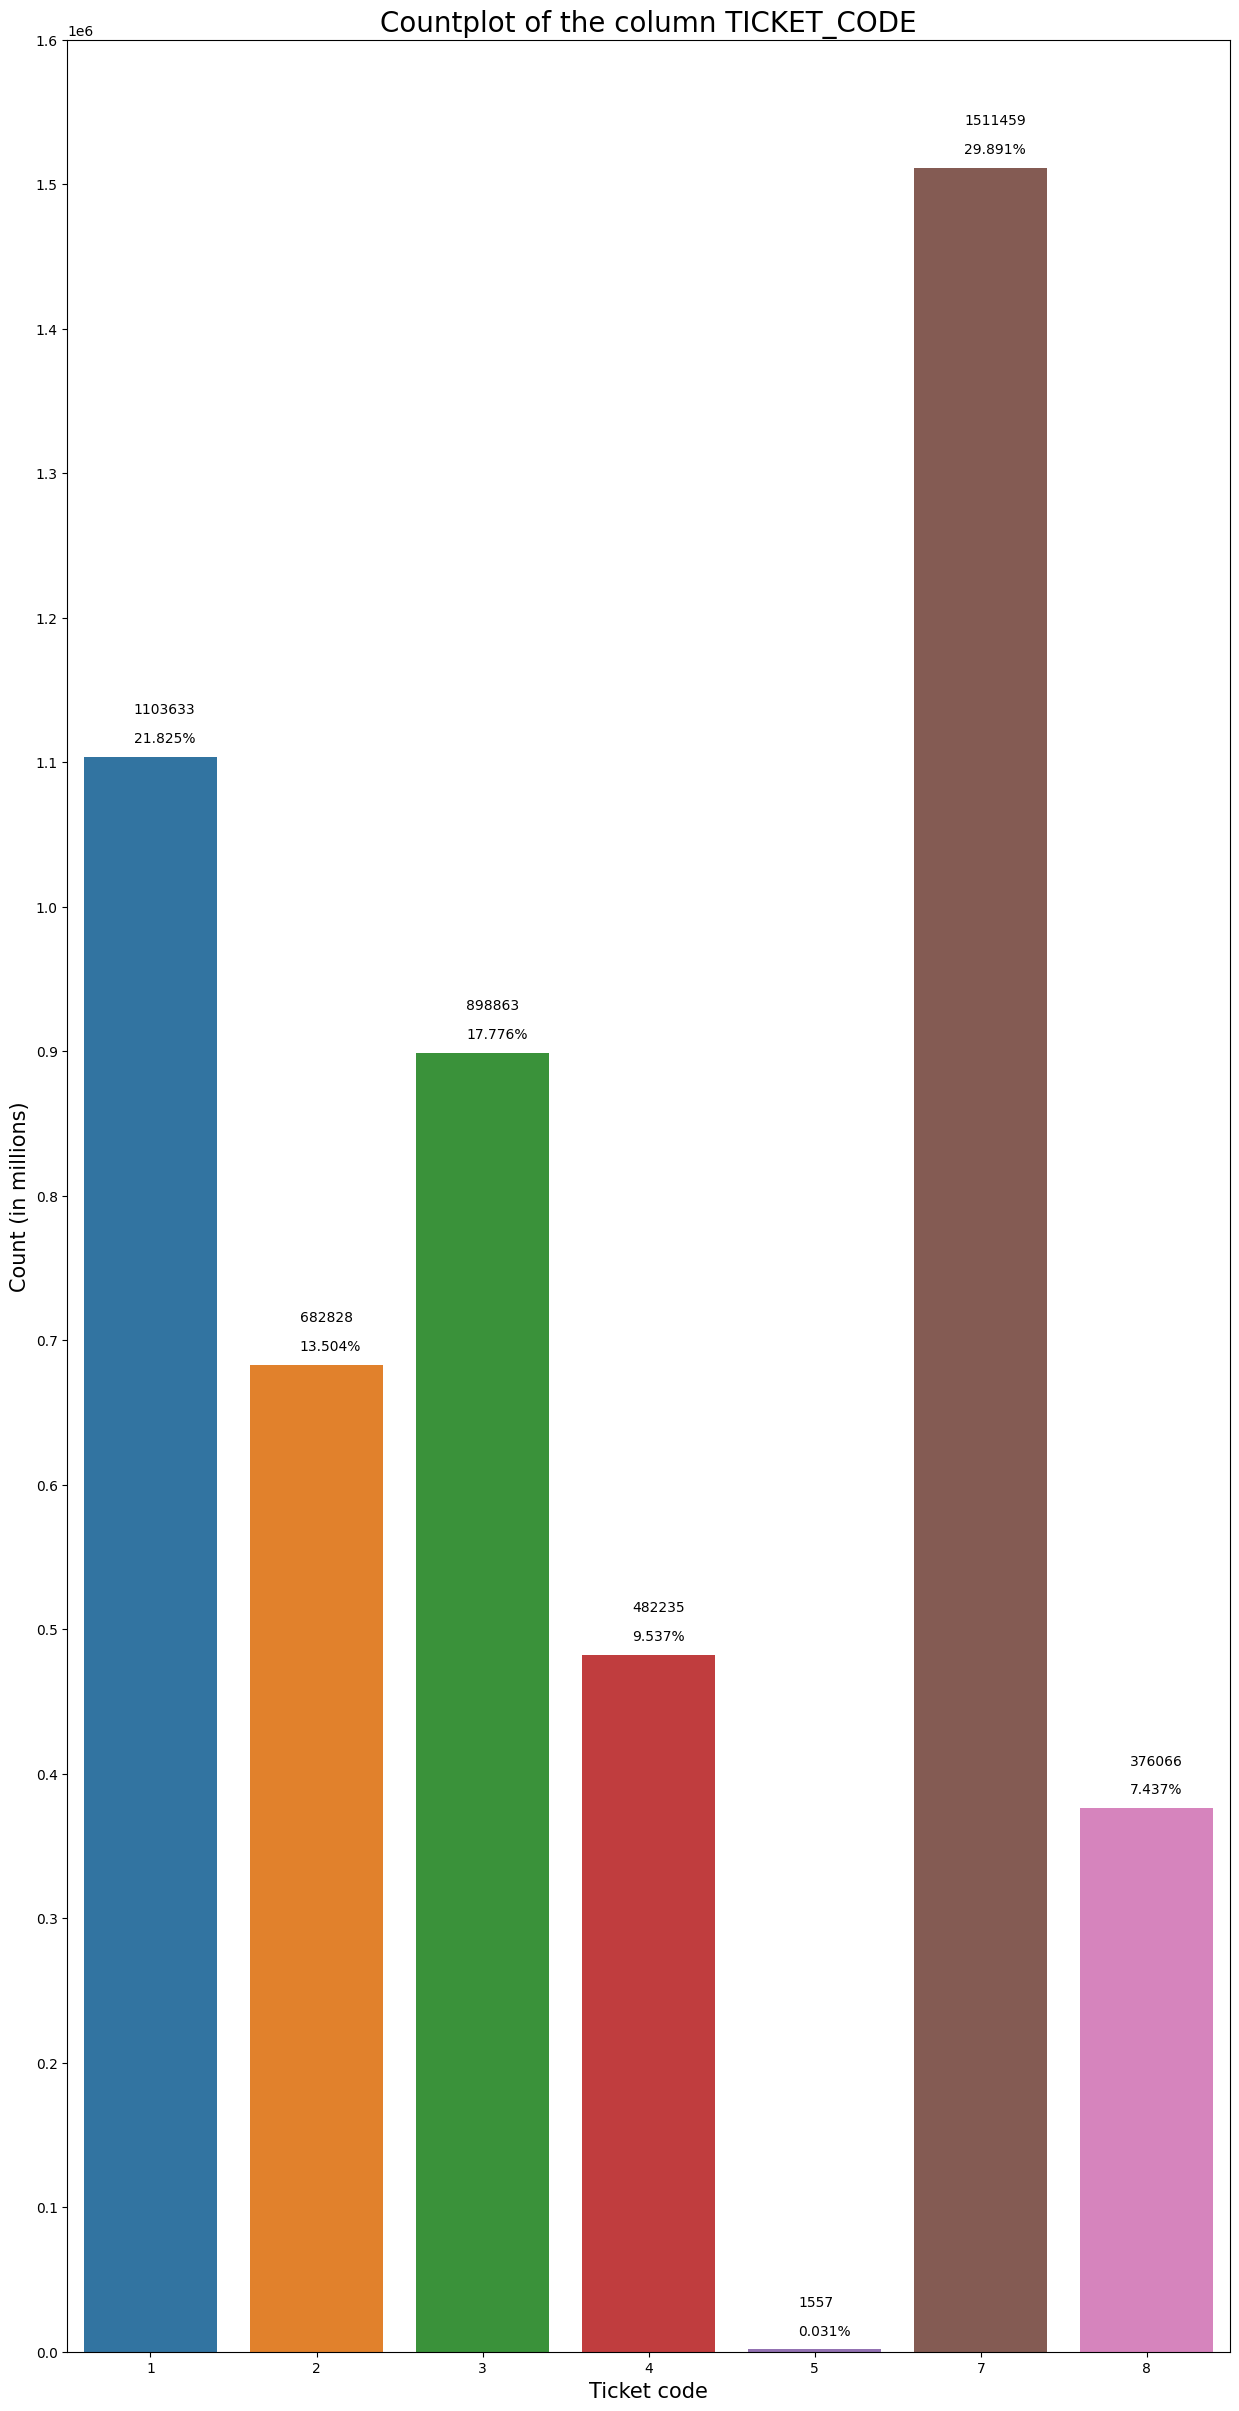

In [142]:
# Countplot of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(15,8))
# Countplot of the column 'TICKET_CODE'
sns.countplot(x='TICKET_CODE', data=df, order=df['TICKET_CODE'].value_counts().sort_index().index)
plt.title('Countplot of the column TICKET_CODE', fontsize=20)
plt.xlabel('Ticket code', fontsize=15)
plt.ylabel('Count (in millions)', fontsize=15)

# Change yticks to have a better visualization
scale = np.arange(0, max(df['TICKET_CODE'].value_counts())+100000, 100000)
plt.yticks(scale)

# Add the percentage of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10000))

# Add the count of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30000))

# Add a padding on the top of the plot
plt.subplots_adjust(top=3)

plt.show()

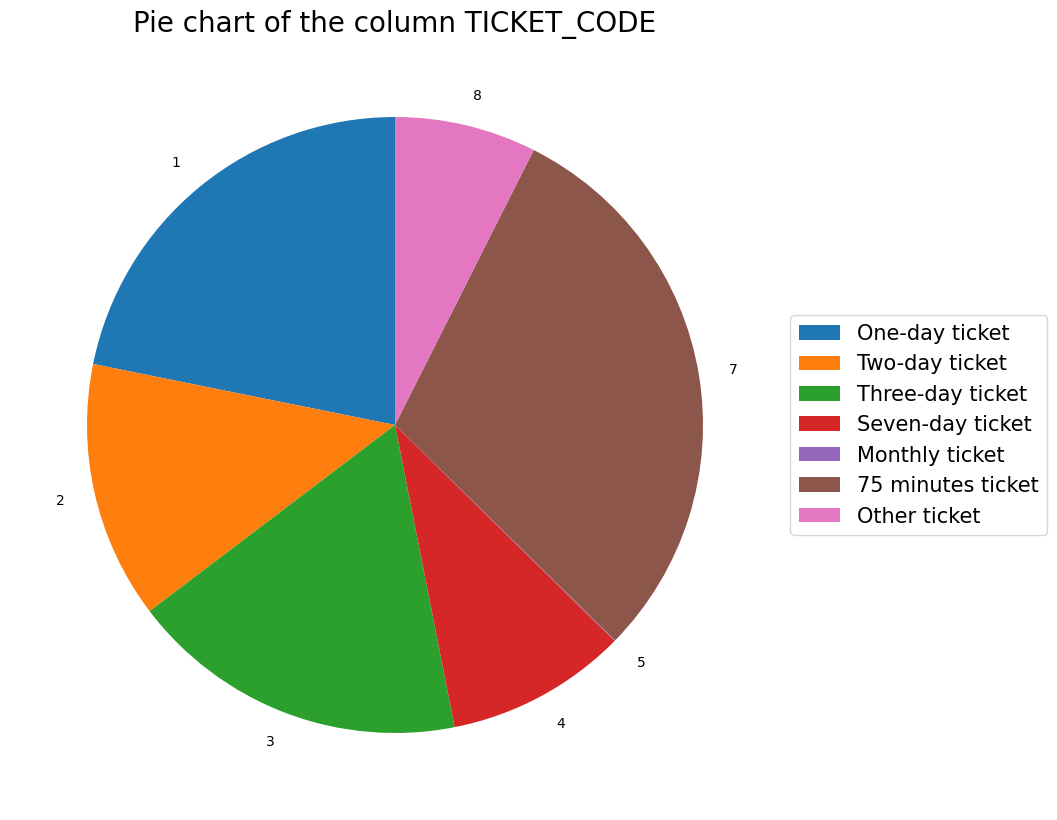

In [143]:
# Plot a pie chart of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(20,10))
df['TICKET_CODE'].value_counts().sort_index().plot.pie(startangle=90)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column TICKET_CODE', fontsize=20)
plt.ylabel('')
fig.patch.set_facecolor('white')
plt.show()

#### Focus on Montly tickets

In [144]:
# Find the 'FERMATA' and 'DESCRIZIONE' distributions of the monthly tickets
df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index()

print('The number of different stops (FERMATA) where the monthly tickets are used is: {}'.format(len(df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index())))
print('The stops (FERMATA) where the monthly tickets are used are: {}'.format(df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index().index))
print('The descriptions of the stops (DESCRIZIONE) of the monthly tickets are: {}'.format(df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().index))

The number of different stops (FERMATA) where the monthly tickets are used is: 4
The stops (FERMATA) where the monthly tickets are used are: Int64Index([5022, 5031, 5039, 7777], dtype='int64')
The descriptions of the stops (DESCRIZIONE) of the monthly tickets are: Index(['Giudecca Pal', 'P.le Roma "G', 'PEOPLE MOVER', 'Rialto'], dtype='object')


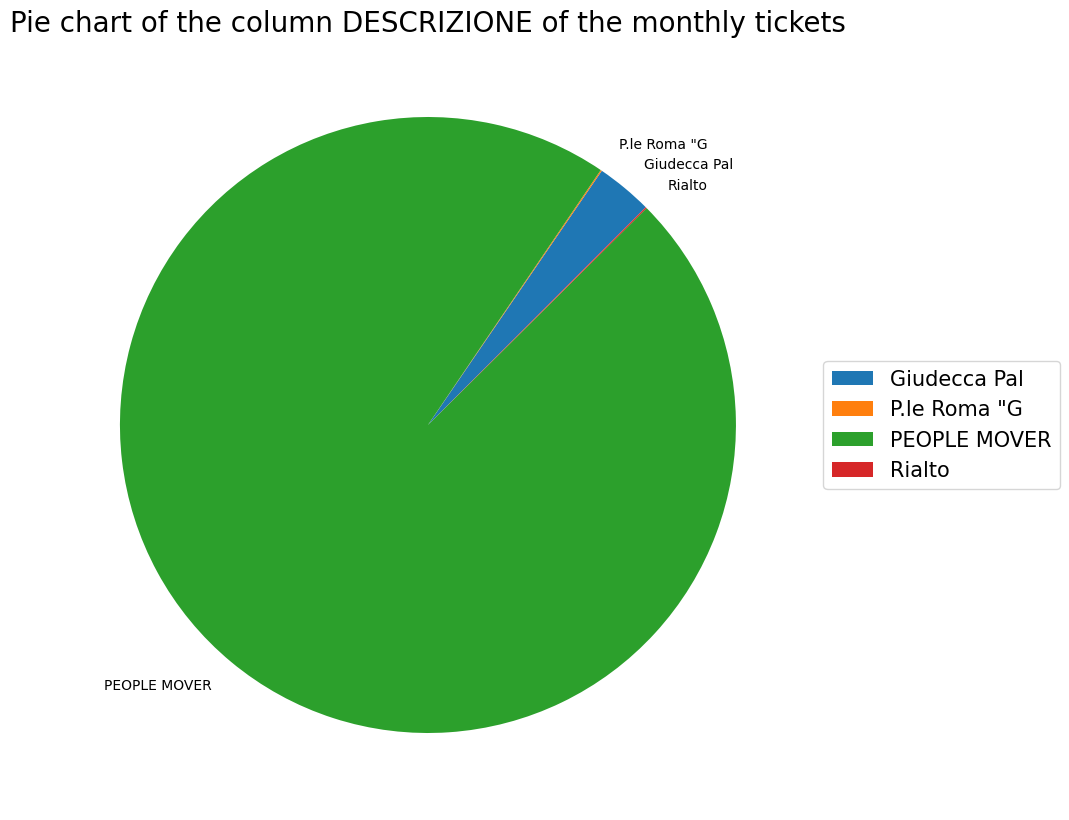

In [145]:
# Plot a pie chart of the column 'DESCRIZIONE' of the monthly tickets
fig, ax = plt.subplots(figsize=(20,10))
df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().plot.pie(startangle=45)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column DESCRIZIONE of the monthly tickets', fontsize=20)
plt.ylabel('')

fig.patch.set_facecolor('white')
plt.show()

#### Delete the validation that are with TICKET_CODE = 7b (other tickets) 

In [154]:
# shape_before = df.shape[0]

# Delete 7b tickets because they are not useful for the analysis 
# df = df[df['TICKET_CODE'] != '7b']

# Print the number of rows before and after the deletion of the 7b tickets and the difference
# print('The number of rows before the deletion of the 7b tickets is: {}'.format(shape_before))
# print('The number of rows after the deletion of the 7b tickets is: {}'.format(df.shape[0]))
# print('The difference is: {}'.format(shape_before - df.shape[0]))

# TODO: to de-comment later

## Data Cleaning

### Useless stamps

In [155]:
# TODO: #1 Remove useless rows that have a minimum temporal gap for the same serial and fermata

In [156]:
# Find the serial with the hightest number of validations, and the same for each ticket profile, save the results in a dictionary
dict_serial = {}
for ticket in df['TICKET_CODE'].unique():
    dict_serial[ticket] = df[df['TICKET_CODE'] == ticket]['SERIALE'].value_counts().index[0]

# Print the serial with the hightest number of validations, and the same for each ticket profile
for ticket in df['TICKET_CODE'].unique():
    print('The serial with the hightest number of validations for the ticket profile {} is: {}'.format(ticket, dict_serial[ticket]))

The serial with the hightest number of validations for the ticket profile 4 is: 36426331588593156
The serial with the hightest number of validations for the ticket profile 2 is: 36426331589000964
The serial with the hightest number of validations for the ticket profile 3 is: 37267197319456004
The serial with the hightest number of validations for the ticket profile 7b is: 36423061640512004
The serial with the hightest number of validations for the ticket profile 1 is: 65676289371959301
The serial with the hightest number of validations for the ticket profile 7a is: 36088518040128516
The serial with the hightest number of validations for the ticket profile 5 is: 37548759405902084


In [157]:
# Group by the serial and the fermata 
df = df.groupby(['SERIALE', 'FERMATA']).apply(lambda x: x.sort_values(by='DATA_VALIDAZIONE', ascending=True))

# Print the first 5 rows of the df
df.head()

DATA       ORA    DATA_VALIDAZIONE  \
SERIALE           FERMATA                                                   
36031244634932740 2749    246383 2022-05-16  08:31:00 2022-05-16 08:31:00   
                  6081    246763 2022-05-16  08:41:00 2022-05-16 08:41:00   
36060797649139716 5013    226152 2022-05-15  17:22:00 2022-05-15 17:22:00   
                  5032    226786 2022-05-15  17:27:00 2022-05-15 17:27:00   
36062264383476484 5031    213279 2022-05-15  15:21:00 2022-05-15 15:21:00   

                                            SERIALE  FERMATA   DESCRIZIONE  \
SERIALE           FERMATA                                                    
36031244634932740 2749    246383  36031244634932740     2749       Treviso   
                  6081    246763  36031244634932740     6081  MESTRE CENTR   
36060797649139716 5013    226152  36060797649139716     5013  San Marco-Sa   
                  5032    226786  36060797649139716     5032  FERROVIA "B"   
36062264383476484 5031    213279  36062264383476484     5031  P.le Roma "G   

                                  TITOLO TICKET_CODE  \
SERIALE           FERMATA                              
36031244634932740 2749    246383   12101          7a   
                  6081    246763   12101          7a   
36060797649139716 5013    226152   11101          7a   
                  5032    226786   11101          7a   
36062264383476484 5031    213279   11101          7a   

                                           DESCRIZIONE_TITOLO  
SERIALE           FERMATA                                      
36031244634932740 2749    246383  Bigl.Aut.75'Mestre/Lido-tsc  
                  6081    246763  Bigl.Aut.75'Mestre/Lido-tsc  
36060797649139716 5013    226152       75'-Tpl 6,64-ComVe0,86  
                  5032    226786       75'-Tpl 6,64-ComVe0,86  
36062264383476484 5031    213279       75'-Tpl 6,64-ComVe0,86

In [158]:
# Reset the index of the df and drop the old index in order to have a new index starting from 0 to the number of rows
# It is necessary to have a new index because the groupby function has created a multi-index
df.reset_index(drop=True, inplace=True)

In [159]:
# Create a new column 'MIN_TEMPORAL_GAP' that contains the minimum temporal gap between two validations for the same serial and fermata in minutes
df = df.groupby(['SERIALE', 'FERMATA','DATA']).apply(lambda x: x.assign(MIN_TEMPORAL_GAP = x['DATA_VALIDAZIONE'].diff().dt.total_seconds()/60))

In [160]:
df.head(20)

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO,MIN_TEMPORAL_GAP
0,2022-05-16,08:31:00,2022-05-16 08:31:00,36031244634932740,2749,Treviso,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
1,2022-05-16,08:41:00,2022-05-16 08:41:00,36031244634932740,6081,MESTRE CENTR,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
2,2022-05-15,17:22:00,2022-05-15 17:22:00,36060797649139716,5013,San Marco-Sa,11101,7a,"75'-Tpl 6,64-ComVe0,86",NaN
3,2022-05-15,17:27:00,2022-05-15 17:27:00,36060797649139716,5032,"FERROVIA ""B""",11101,7a,"75'-Tpl 6,64-ComVe0,86",NaN
4,2022-05-15,15:21:00,2022-05-15 15:21:00,36062264383476484,5031,"P.le Roma ""G",11101,7a,"75'-Tpl 6,64-ComVe0,86",NaN
5,2022-05-13,07:17:00,2022-05-13 07:17:00,36062329073519108,3581,Cappelletta,14122,7b,Extra tratta 2,NaN
6,2022-05-18,08:54:00,2022-05-18 08:54:00,36062329073913348,2609,Noale,14124,7b,Extra tratta 4,NaN
7,2022-05-16,07:13:00,2022-05-16 07:13:00,36062329074176004,3363,Moniego Trev,14122,7b,Extra tratta 2,NaN
8,2022-05-17,07:19:00,2022-05-17 07:19:00,36062329074435076,2609,Noale,14122,7b,Extra tratta 2,NaN
9,2022-05-17,07:19:00,2022-05-17 07:19:00,36062329074435076,2609,Noale,14122,7b,Extra tratta 2,0.0


In [161]:
df.tail(20)

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO,MIN_TEMPORAL_GAP
505644,2022-05-15,12:13:00,2022-05-15 12:13:00,65676973862190853,5072,Chioggia Pia,11222,7b,Tariffa carozzina,NaN
505645,2022-05-13,13:31:00,2022-05-13 13:31:00,65676974331559685,8029,Fisica Depos,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
505646,2022-05-13,15:18:00,2022-05-13 15:18:00,65676974331559685,8029,Fisica Depos,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,107.0
505647,2022-05-14,08:22:00,2022-05-14 08:22:00,65676974609431813,283,Don Sturzo V,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
505648,2022-05-19,10:14:00,2022-05-19 10:14:00,65676975409889029,3320,Sottomarina,15114,7b,Carnet CHIOGGIA 10c. TICKET,NaN
505649,2022-05-16,15:23:00,2022-05-16 15:23:00,65676975947021061,162,Stazione MES,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
505650,2022-05-13,09:48:00,2022-05-13 09:48:00,65676976708154117,2515,Ospedale Mir,14122,7b,Extra tratta 2,NaN
505651,2022-05-15,20:13:00,2022-05-15 20:13:00,65676977554880773,6084,VENEZIA CORS,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
505652,2022-05-14,08:39:00,2022-05-14 08:39:00,65677030157024261,6080,MESTRE CENTR,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
505653,2022-05-19,13:52:00,2022-05-19 13:52:00,65677033610311173,33,Miranese Laz,14123,7b,Extra tratta 3,NaN


In [162]:
df['MIN_TEMPORAL_GAP'].value_counts()

0.0       15638
1.0        3708
2.0        2310
3.0        1562
4.0        1093
5.0         851
6.0         629
7.0         571
8.0         480
9.0         432
10.0        398
11.0        283
12.0        248
13.0        223
14.0        198
15.0        188
18.0        168
19.0        162
17.0        137
16.0        131
20.0         95
21.0         86
23.0         74
24.0         74
22.0         69
25.0         68
28.0         61
27.0         58
30.0         56
26.0         47
29.0         46
395.0        40
340.0        38
31.0         37
458.0        37
453.0        35
475.0        35
248.0        34
35.0         34
32.0         34
41.0         33
346.0        33
341.0        33
449.0        32
462.0        32
476.0        31
265.0        31
293.0        30
419.0        30
63.0         30
441.0        30
326.0        30
214.0        30
408.0        30
236.0        30
259.0        29
435.0        29
281.0        29
558.0        29
412.0        29
222.0        29
274.0        29
287.0   

In [163]:
# How many rows have a minimum temporal gap equal to NaN?
df[df['MIN_TEMPORAL_GAP'].isna()].shape[0]

464642

In [164]:
# Cleaning operation: remove the rows using the minimum temporal gap

print('The minimum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].min()))
print('The value of the 50% percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.5)))

shape_before = df.shape[0]

# Delete the rows that have a minimum temporal gap for the same serial and fermata less than the value of the 50% percentile
# Do not remove the rows with NaN values because they are the first validations of the day of a specific serial and fermata usefull for the analysis
df = df[(df['MIN_TEMPORAL_GAP'] > df['MIN_TEMPORAL_GAP'].quantile(0.5)) | (df['MIN_TEMPORAL_GAP'].isna())]

# Print the number of rows before and after the cleaning operation and the difference
print('The number of rows before the cleaning operation is: {}'.format(shape_before))
print('The number of rows after the cleaning operation is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))
# Calculate the percentage of rows that has just been deleted
print('The percentage of rows that has just been deleted is: {}%'.format(round((shape_before - df.shape[0])/shape_before*100, 2)))

The minimum value of the column MIN_TEMPORAL_GAP is: 0.0
The value of the 50% percentile of the column MIN_TEMPORAL_GAP is: 2.0
The number of rows before the cleaning operation is: 505664
The number of rows after the cleaning operation is: 484008
The difference is: 21656
The percentage of rows that has just been deleted is: 4.28%


### Stops similar

In [165]:
# Print the number of unique values in the column 'DESCRIZIONE' that are the names of the stops
print('The number of unique values in the column DESCRIZIONE is: {}'.format(df['DESCRIZIONE'].nunique()))

The number of unique values in the column DESCRIZIONE is: 714


In [166]:
# Define a function that returns the common prefix of a list of strings
def get_common_prefix(string_list):
    # input di tipo  string_list = ["Mestre Centro", "Mirano Centro"]
    first_prefix = string_list[0].split(" ")[0]
    # create and empty dictionary
    prefix_dict = {}

    for string in string_list[1:]:
        if not string.startswith(first_prefix):
            first_prefix = string.split(" ")[0]
            if string.startswith(first_prefix):
                # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
                prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
        else:
            # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
            prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
    return prefix_dict
    

In [167]:
# To avoid problem regarding the letters in uppercase and lowercase, convert all the letters in uppercase
df['DESCRIZIONE'] = df['DESCRIZIONE'].str.upper()

In [168]:
# Use the function get_common_prefix to find the common prefix of the strings in the column 'DESCRIZIONE' and print the result

# Crete a string list with the unique values of the column 'DESCRIZIONE'
string_list = df['DESCRIZIONE'].unique().tolist()

dict_prefix = get_common_prefix(string_list)
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

# Print the number of keys in the dictionary
print('The number of keys in the dictionary is: {}'.format(len(dict_prefix.keys())))

MESTRE: ['MESTRE CENTR', 'MESTRE STAZI', 'MESTRE VIA M']
SAN: ['SAN MARCO-SA', "SAN TOMA'", 'SAN MARCO VA', 'SAN BASILIO', 'SANTA MARTA', 'SANTA MARIA ', "SANT'ANTONIO", 'SANTA MARGHE', 'SAN PIETRO D', 'SAN SILVESTR', "SANT' ELENA", 'SAN STAE', "SANT' ALVISE", 'SAN GIORGIO', "SANT' ANGELO", 'SAN SAMUELE', 'SAN MARCO MO', "SAN DONA' MA", "SAN DONA' CE", "SAN DONA' VA", "SANT'ANGELO ", 'SAN MARCO FO', 'SAN MARCO CA', 'SAN LIBERALE', "SAN DONA' RI", "SAN DONA' PA", 'SAN LAZZARO', 'SAN SERVOLO', 'SAN MARCO BO', "SAN DONA' FA", 'SAN MARCO MA', "SAN NICOLO'", 'SAN MARCO SA', 'SAN MARCO MU', 'SAN ROCCO BR', 'SAN PIETRO P', "SAN DONA' PI", 'SAN PIETRO B', "SAN NICOLO' ", 'SANPIETRO CA', "SANT'ALBERTO", 'SANT ANGELO ', 'SAN MICHELE ', 'SAN TROVASO', 'SAN PIETRO C', 'SANDON CHIUS', "SAN DONA' PE"]
FERROVIA: ['FERROVIA "B"', 'FERROVIA "D"', 'FERROVIA "C"', 'FERROVIA "A"', 'FERROVIA "E"']
P.LE: ['P.LE ROMA "G', 'P.LE ROMA "F', 'P.LE ROMA "B', 'P.LE ROMA "E', 'P.LE ROMA "C', 'P.LE ROMA "D']
CAPPELL

#### Update some keys in the dictionary

In [169]:
# Rename the key 'P.le' with 'P.le Roma'
dict_prefix['P.LE ROMA'] = dict_prefix.pop('P.LE')
# Rename the key 'F.TE' with 'F.TE NOVE'
dict_prefix['F.TE NOVE'] = dict_prefix.pop('F.TE')

In [170]:
# Print the values of the dictionary with the keys 'S.' and 'San'
print('The values of the dictionary with the key S. are: {}'.format(dict_prefix['S.']))
print('The values of the dictionary with the key San are: {}'.format(dict_prefix['SAN']))

The values of the dictionary with the key S. are: ['S. ERASMO PU', 'S.ERASMO CAP', 'S. MARCUOLA-', 'S.ERASMO CHI', 'S. MARCO (GI']
The values of the dictionary with the key San are: ['SAN MARCO-SA', "SAN TOMA'", 'SAN MARCO VA', 'SAN BASILIO', 'SANTA MARTA', 'SANTA MARIA ', "SANT'ANTONIO", 'SANTA MARGHE', 'SAN PIETRO D', 'SAN SILVESTR', "SANT' ELENA", 'SAN STAE', "SANT' ALVISE", 'SAN GIORGIO', "SANT' ANGELO", 'SAN SAMUELE', 'SAN MARCO MO', "SAN DONA' MA", "SAN DONA' CE", "SAN DONA' VA", "SANT'ANGELO ", 'SAN MARCO FO', 'SAN MARCO CA', 'SAN LIBERALE', "SAN DONA' RI", "SAN DONA' PA", 'SAN LAZZARO', 'SAN SERVOLO', 'SAN MARCO BO', "SAN DONA' FA", 'SAN MARCO MA', "SAN NICOLO'", 'SAN MARCO SA', 'SAN MARCO MU', 'SAN ROCCO BR', 'SAN PIETRO P', "SAN DONA' PI", 'SAN PIETRO B', "SAN NICOLO' ", 'SANPIETRO CA', "SANT'ALBERTO", 'SANT ANGELO ', 'SAN MICHELE ', 'SAN TROVASO', 'SAN PIETRO C', 'SANDON CHIUS', "SAN DONA' PE"]


##### S.Erasmo

In [171]:
# Create a new key in the dictionary with the key S.ERASMO; insert as value the list of strings that have the prefix 'S.ERASMO'
dict_prefix['S.ERASMO'] = [string for string in dict_prefix['S.'] if string.startswith('S.ERASMO')]

# Add the value 'S. Erasmo Pu' originally in the key 'San' to the key 'S.ERASMO'
dict_prefix['S.ERASMO'].append('S. ERASMO PU')

# Remove the strings that have the prefix 'S.ERASMO' from the keys 'S.' and 'San'
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S.ERASMO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. ERASMO PU')]

# Print the values of the dictionary with the key 'S.ERASMO'
print('The values of the dictionary with the key S.ERASMO are: {}'.format(dict_prefix['S.ERASMO']))

The values of the dictionary with the key S.ERASMO are: ['S.ERASMO CAP', 'S.ERASMO CHI', 'S. ERASMO PU']


##### San Marco

In [172]:
# Create a new key in the dictionary with the key 'San Marco'; insert as value the list of strings that have the prefix 'San Marco'
dict_prefix['SAN MARCO'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN MARCO')]


# Add the value S. MARCO (Gi', 'S. Pietro in Gu') originally in the key 'S.' to the key 'San Marco'
dict_prefix['SAN MARCO'].append('S. MARCO (GI')

# Remove the strings that have the prefix 'San Marco' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN MARCO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. MARCO (GI')]

# Print the values of the dictionary with the key 'San Marco'
print('The values of the dictionary with the key San Marco are: {}'.format(dict_prefix['SAN MARCO']))

The values of the dictionary with the key San Marco are: ['SAN MARCO-SA', 'SAN MARCO VA', 'SAN MARCO MO', 'SAN MARCO FO', 'SAN MARCO CA', 'SAN MARCO BO', 'SAN MARCO MA', 'SAN MARCO SA', 'SAN MARCO MU', 'S. MARCO (GI']


##### San Dona'

In [173]:
# Create a new key in the dictionary with the key 'San Dona'; insert as value the list of strings that have the prefix 'San Dona'
dict_prefix['SAN DONA'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN DONA')]

# Remove the strings that have the prefix 'San Dona' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN DONA')]

# Print the values of the dictionary with the key 'San Dona'
print('The values of the dictionary with the key San Dona are: {}'.format(dict_prefix['SAN DONA']))

The values of the dictionary with the key San Dona are: ["SAN DONA' MA", "SAN DONA' CE", "SAN DONA' VA", "SAN DONA' RI", "SAN DONA' PA", "SAN DONA' FA", "SAN DONA' PI", "SAN DONA' PE"]


#### San Pietro

In [174]:
# Create a new key in the dictionary with the key 'San Pietro'; insert as value the list of strings that have the word 'Pietro' in the string
dict_prefix['SAN PIETRO'] = [string for string in dict_prefix['SAN'] if 'PIETRO' in string] + [string for string in dict_prefix['S.'] if 'PIETRO' in string]

# Remove the strings that have the word 'Pietro' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if 'PIETRO' not in string]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if 'PIETRO' not in string]

# Print the values of the dictionary with the key 'San Pietro'
print('The values of the dictionary with the key San Pietro are: {}'.format(dict_prefix['SAN PIETRO']))

The values of the dictionary with the key San Pietro are: ['SAN PIETRO D', 'SAN PIETRO P', 'SAN PIETRO B', 'SANPIETRO CA', 'SAN PIETRO C']


#### Ca' Rossa

In [175]:
# Create a new key in the dictionary with the key 'Ca' Rossa'; insert as value the list of strings that have the word 'Ca' Rossa' in the string
dict_prefix['CA\' ROSSA'] = [string for string in dict_prefix['CA\''] if 'CA' in string and 'ROSSA' in string]

# Remove the strings that have the word 'Ca' Rossa' from the keys 'Ca''
dict_prefix['CA\''] = [string for string in dict_prefix['CA\''] if 'CA' not in string or 'ROSSA' not in string]

# Print the values of the dictionary with the key 'Ca Rossa'
print('The values of the dictionary with the key Ca\' Rossa are: {}'.format(dict_prefix['CA\' ROSSA']))

The values of the dictionary with the key Ca' Rossa are: ["CA' ROSSA VO", "CA' ROSSA BI", "CA' ROSSA OB", "CA' ROSSA SE"]


##### Manage the remaining values in the keys 'S.' and 'San' and others

In [178]:
# Manage the remaining values in the keys 'S.', 'San', 'Santa', 'Sant'', 'Ca'', 'Piazza', 'Piazzale', 'Stazione', 'Treviso, 'Trento', 'Incr.'
# Create a new key for each value in the keys as above and assign the value as value of the new key
for value in dict_prefix['S.']:
    dict_prefix[value] = [value]

for value in dict_prefix['SAN']:
    dict_prefix[value] = [value]

for value in dict_prefix['SANTA']:
    dict_prefix[value] = [value]

for value in dict_prefix['SANT\'']:
    dict_prefix[value] = [value]

for value in dict_prefix['CA\'']:
    dict_prefix[value] = [value]

for value in dict_prefix['PIAZZA']:
    dict_prefix[value] = [value]

for value in dict_prefix['PIAZZALE']:
    dict_prefix[value] = [value]

for value in dict_prefix['VIA']:
    dict_prefix[value] = [value]

for value in dict_prefix['STAZIONE']:
    dict_prefix[value] = [value]

for value in dict_prefix['TREVISO']:
    dict_prefix[value] = [value]

for value in dict_prefix['TRENTO']:
    dict_prefix[value] = [value]

# for value in dict_prefix['INCR.']:
    # dict_prefix[value] = [value]

# for value in dict_prefix['DE']:
    # dict_prefix[value] = [value]



# Remove the keys 'S.' and 'San' witout printing the values
dict_prefix.pop('S.')
dict_prefix.pop('SAN')
dict_prefix.pop('SANTA')
dict_prefix.pop('SANT\'')
dict_prefix.pop('CA\'')
dict_prefix.pop('PIAZZA')
dict_prefix.pop('PIAZZALE')
dict_prefix.pop('VIA')
dict_prefix.pop('STAZIONE')
dict_prefix.pop('TREVISO')
dict_prefix.pop('TRENTO')
# dict_prefix.pop('INCR.')
# dict_prefix.pop('DE')

['TRENTO PODGO']

#### Treviso and Trento

In [179]:
# Remove the values Treviso, Trento, Trezzo and Treporti from the key 'Tre'
dict_prefix['TRE'] = [string for string in dict_prefix['TRE'] if 'TREVISO' not in string and 'TRENTO' not in string and 'TREZZO' not in string and 'TREPORTI' not in string]

# Print the values of the dictionary with the key 'Tre'
print('The values of the dictionary with the key Tre are: {}'.format(dict_prefix['TRE']))

# TODO: Correct the values of the keys 'Treviso' and 'Trento' with the correct values

The values of the dictionary with the key Tre are: ['TRE ARCHI']


#### Keys with only an item

In [180]:
# If a key as only one value, then rename the key with the value
# Use copy() to avoid RuntimeError: dictionary changed size during iteration
for key, value in dict_prefix.copy().items():
    if len(value) == 1:
        dict_prefix[value[0]] = dict_prefix.pop(key)

##### Finally, the update dictionary is

In [181]:
# Print the dictionary in the new format
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

MESTRE: ['MESTRE CENTR', 'MESTRE STAZI', 'MESTRE VIA M']
FERROVIA: ['FERROVIA "B"', 'FERROVIA "D"', 'FERROVIA "C"', 'FERROVIA "A"', 'FERROVIA "E"']
NOALE: ['NOALE', 'NOALE OSPEDA', 'NOALE DEI NO', 'NOALE LANCER', 'NOALE ONGARI', 'NOALE BACCHI']
VENEZIA: ['VENEZIA', 'VENEZIA CORS']
ROBEGANO: ['ROBEGANO MON', 'ROBEGANO CEN', 'ROBEGANO PUC', 'ROBEGANO 25 ']
RINASCITA: ['RINASCITA BE', 'RINASCITA EM']
TRONCHETTO: ['TRONCHETTO F', 'TRONCHETTO', 'TRONCHETTO M', 'TRONCHETTO T']
BURANO: ['BURANO "C"', 'BURANO "B"', 'BURANO "A"']
MURANO: ['MURANO MUSEO', 'MURANO VENIE', 'MURANO COLON', 'MURANO NAVAG', 'MURANO FARO', 'MURANO SEREN', 'MURANO DA MU']
SPINEA: ['SPINEA POZZU', 'SPINEA DESEN', 'SPINEA GIORG', 'SPINEA ORGNA', 'SPINEA ROSSI', 'SPINEA ALFIE', 'SPINEA MARTI', 'SPINEA SANRE', 'SPINEA PIAZZ', 'SPINEA CENTR', 'SPINEA REPUB', 'SPINEA VILLA', 'SPINEA SAN R', 'SPINEA LUNEO', 'SPINEA']
GIARDINI: ['GIARDINI BIE', 'GIARDINI "B"']
MONTE: ['MONTE CELO F', 'MONTE CERVIN']
LIDO: ['LIDO SAN NIC', 'LID

In [182]:
# Export the dictionary in a json file
import json
with open('data/dictionaries/dict_prefix.json', 'w') as fp:
    json.dump(dict_prefix, fp)

In [183]:
# Create a new dataframe, copied from the original one
df_new = df.copy() 

# Update the column 'DESCRIZIONE' of the new df with the new values of the dictionary: 
# the value that are present in the dataframe are the values of the dictionary; you have to sobstitute with the key of the dictionary
for key, value in dict_prefix.items():
    df_new['DESCRIZIONE'] = df_new['DESCRIZIONE'].replace(value, key)


# Print the head of the new dataframe
print(df_new.head())

# Export the new dataframe in a txt file
# The name of the file is dataset_cleaned followed by the name (file_name variable) of the file that has been cleaned with txt extension
name_file = 'dataset_cleaned_' + file_name.split('.')[0] + '.txt'
df_new.to_csv('data/processed/' + name_file, sep='\t', index=False)

print('The script has finished')

        DATA       ORA    DATA_VALIDAZIONE            SERIALE  FERMATA  \
0 2022-05-16  08:31:00 2022-05-16 08:31:00  36031244634932740     2749   
1 2022-05-16  08:41:00 2022-05-16 08:41:00  36031244634932740     6081   
2 2022-05-15  17:22:00 2022-05-15 17:22:00  36060797649139716     5013   
3 2022-05-15  17:27:00 2022-05-15 17:27:00  36060797649139716     5032   
4 2022-05-15  15:21:00 2022-05-15 15:21:00  36062264383476484     5031   

  DESCRIZIONE  TITOLO TICKET_CODE           DESCRIZIONE_TITOLO  \
0     TREVISO   12101          7a  Bigl.Aut.75'Mestre/Lido-tsc   
1      MESTRE   12101          7a  Bigl.Aut.75'Mestre/Lido-tsc   
2   SAN MARCO   11101          7a       75'-Tpl 6,64-ComVe0,86   
3    FERROVIA   11101          7a       75'-Tpl 6,64-ComVe0,86   
4   P.LE ROMA   11101          7a       75'-Tpl 6,64-ComVe0,86   

   MIN_TEMPORAL_GAP  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
The script has finished
